In [17]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '../merged_output/final_file.csv'

In [4]:
df = pd.read_csv(file_path, delimiter=',')

In [5]:
df

,web_browser,operating_sys,from_url,to_url,city,latitude,longitude,time_zone,time_in,time_out
0,Mozilla,Windows,www.example.com,www.example.com,San Francisco,37.774929,-122.419418,America/New_York,1632948671,1632948675
1,Mozilla,Windows,t.co,www.example.com,Chicago,41.878113,-87.629799,America/Chicago,1633045671,1633045673
2,Mozilla,Macintosh;,direct,example.com,Sao Paulo,-23.550520,-46.633308,America/Sao_Paulo,1633145671,1633145674
3,GoogleMaps,Windows,www.example.com,www.example.com,New York,40.712776,-74.005974,America/New_York,1633245671,1633245675
4,GoogleMaps,Macintosh,www.example.com,www.example.com,New York,40.712776,-74.005974,America/New_York,1633345671,1633345676
...,...,...,...,...,...,...,...,...,...,...
69,Mozilla,Windows,www.shrewsbury-ma.gov,www.shrewsbury-ma.gov,Shrewsbury,42.286499,-71.714699,America/New_York,1333607030,1333607039
70,Mozilla,Windows,www.shrewsbury-ma.gov,www.shrewsbury-ma.gov,Shrewsbury,42.286499,-71.714699,America/New_York,1333707030,1333707048
71,Mozilla,Windows,plus.url.google.com,www.nasa.gov,Luban,51.116699,15.283300,Europe/Warsaw,1333807030,1333807040
72,Mozilla,Windows,direct,www.nysdot.gov,Seattle,47.595100,-122.332603,America/Los_Angeles,1334107030,1334107040


In [15]:
print("Dataframe columns: \n")
print(df.columns)
print("Dataframe basic stats: \n")
print(df.describe())
print("Dataframe columns data types \n")
print(df.dtypes)

Dataframe columns: 

Index(['web_browser', 'operating_sys', 'from_url', 'to_url', 'city',
       'latitude', 'longitude', 'time_zone', 'time_in', 'time_out'],
      dtype='object')
Dataframe basic stats: 

        latitude   longitude       time_in      time_out
count  74.000000   74.000000  7.400000e+01  7.400000e+01
mean   33.289988  -68.922978  1.503732e+09  1.503732e+09
std    23.120895   41.883753  1.494232e+08  1.494232e+08
min   -23.550520 -122.419418  1.333307e+09  1.333307e+09
25%    37.774929  -87.629799  1.333707e+09  1.333707e+09
50%    40.712776  -74.005974  1.632949e+09  1.632949e+09
75%    42.286499  -46.633308  1.633246e+09  1.633246e+09
max    52.229676   21.012229  1.633746e+09  1.633746e+09
Dataframe columns data types 

web_browser       object
operating_sys     object
from_url          object
to_url            object
city              object
latitude         float64
longitude        float64
time_zone         object
time_in            int64
time_out           int64


In [16]:
print("Dataframe sum of nulls:")
print(df.isnull().sum())

Dataframe sum of nulls:
web_browser      0
operating_sys    0
from_url         0
to_url           0
city             0
latitude         0
longitude        0
time_zone        0
time_in          0
time_out         0
dtype: int64


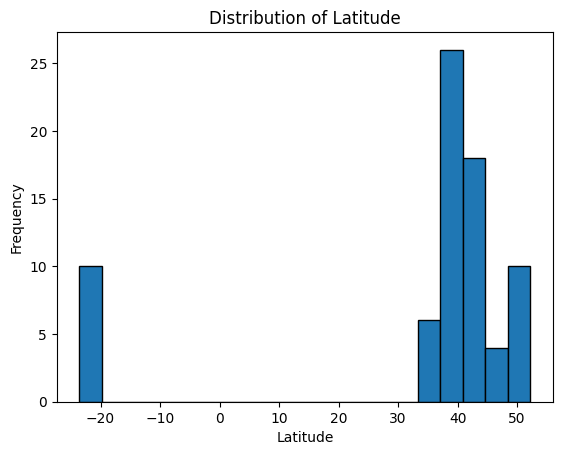

In [18]:
plt.hist(df['latitude'], bins=20, edgecolor='k')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Latitude')
plt.show()

In [20]:
web_browser_distribution = df['web_browser'].value_counts()
print(web_browser_distribution)

web_browser
Mozilla       66
GoogleMaps     8
Name: count, dtype: int64


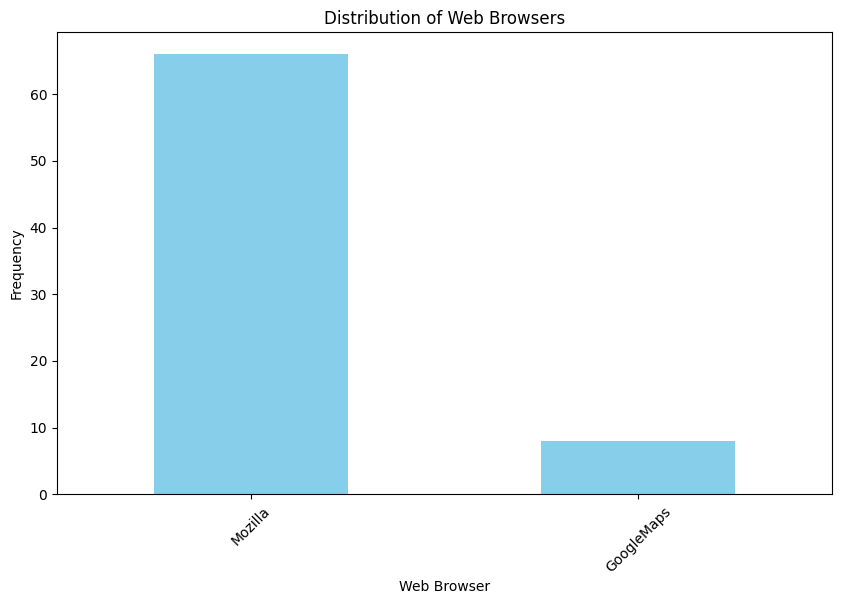

In [21]:
plt.figure(figsize=(10, 6))
web_browser_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Web Browser')
plt.ylabel('Frequency')
plt.title('Distribution of Web Browsers')
plt.xticks(rotation=45)
plt.show()

In [25]:
mask = df['operating_sys'].str.split().str.len() > 1
df_cleaned = df[~mask]

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)
print(df_cleaned.head())

# Save the cleaned DataFrame (optional)
df_cleaned.to_csv('path_to_cleaned_file.csv', index=False)

Original DataFrame shape: (74, 10)
Cleaned DataFrame shape: (59, 10)
  web_browser operating_sys         from_url           to_url           city  \
0     Mozilla       Windows  www.example.com  www.example.com  San Francisco   
1     Mozilla       Windows             t.co  www.example.com        Chicago   
2     Mozilla    Macintosh;           direct      example.com      Sao Paulo   
3  GoogleMaps       Windows  www.example.com  www.example.com       New York   
4  GoogleMaps     Macintosh  www.example.com  www.example.com       New York   

    latitude   longitude          time_zone     time_in    time_out  
0  37.774929 -122.419418   America/New_York  1632948671  1632948675  
1  41.878113  -87.629799    America/Chicago  1633045671  1633045673  
2 -23.550520  -46.633308  America/Sao_Paulo  1633145671  1633145674  
3  40.712776  -74.005974   America/New_York  1633245671  1633245675  
4  40.712776  -74.005974   America/New_York  1633345671  1633345676  


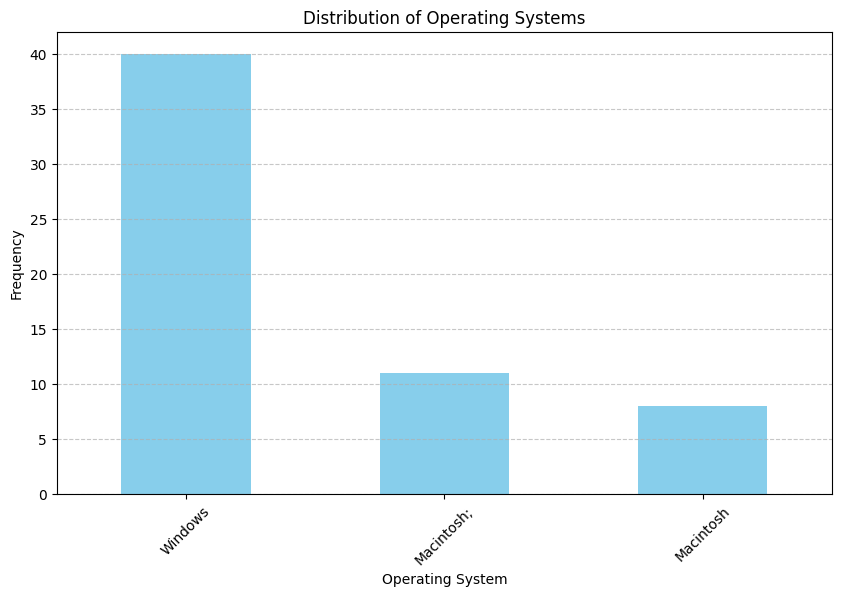

In [26]:
operating_sys_distribution = df_cleaned['operating_sys'].value_counts()

# Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
operating_sys_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Operating System')
plt.ylabel('Frequency')
plt.title('Distribution of Operating Systems')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
